n_clusters = 3
Confusion Matrix:
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]




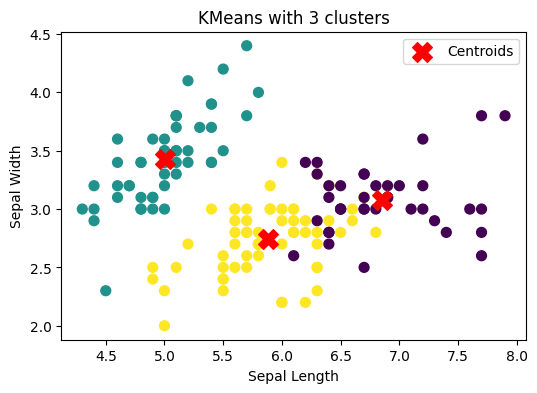

n_clusters = 4
Confusion Matrix:
[[ 0 50  0  0]
 [23  0 27  0]
 [26  0  1 23]
 [ 0  0  0  0]]




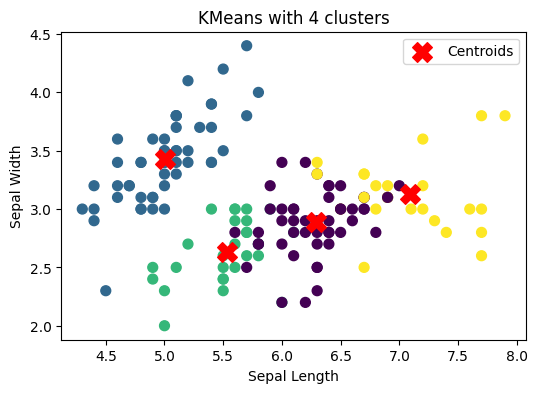

n_clusters = 5
Confusion Matrix:
[[ 0 50  0  0  0]
 [23  0 27  0  0]
 [13  0  1 12 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]




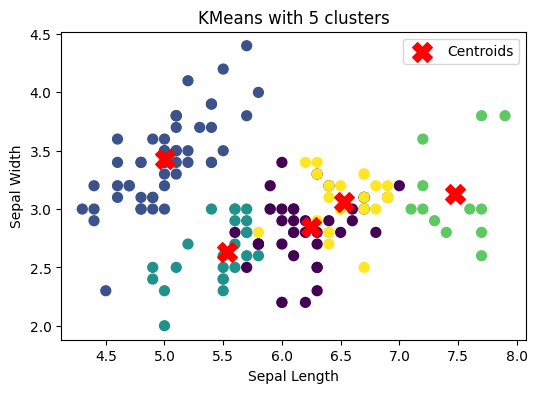

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Try different number of clusters
for n in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    y_kmeans = kmeans.labels_

    print(f"n_clusters = {n}")
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_kmeans))
    print("\n")

    # Scatter plot (Sepal Length vs Sepal Width)
    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                c='red', s=200, marker='X', label='Centroids')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(f"KMeans with {n} clusters")
    plt.legend()
    plt.show()


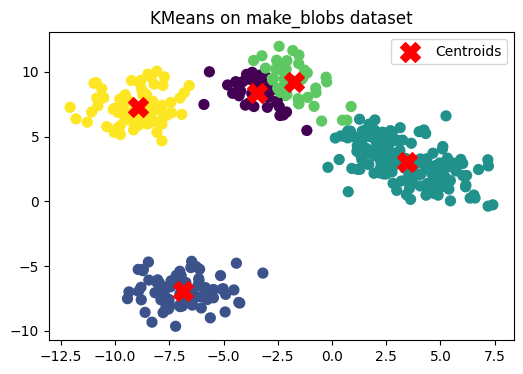

In [10]:
from sklearn.datasets import make_blobs


X_blob, y_blob = make_blobs(n_samples=400, centers=5, cluster_std=1.2, random_state=42)

kmeans_blob = KMeans(n_clusters=5, random_state=42)
kmeans_blob.fit(X_blob)
y_blob_kmeans = kmeans_blob.labels_


plt.figure(figsize=(6,4))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans_blob.cluster_centers_[:,0], kmeans_blob.cluster_centers_[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("KMeans on make_blobs dataset")
plt.legend()
plt.show()


Anomalies:
[[ 5.25793606  6.59644747]
 [-3.18497022 -5.5366197 ]
 [15.         15.        ]
 [16.         14.        ]]


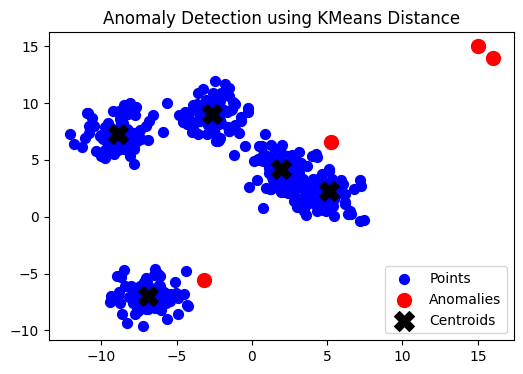

In [11]:
import numpy as np

X_anomaly = np.vstack([X_blob, [[15, 15], [16, 14]]])


kmeans_anom = KMeans(n_clusters=5, random_state=42)
kmeans_anom.fit(X_anomaly)


distances = np.min(np.linalg.norm(X_anomaly[:,None] - kmeans_anom.cluster_centers_, axis=2), axis=1)


threshold = 3 * np.std(distances)
anomalies = X_anomaly[distances > threshold]

print("Anomalies:")
print(anomalies)


plt.figure(figsize=(6,4))
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], c='blue', s=50, label='Points')
plt.scatter(anomalies[:,0], anomalies[:,1], c='red', s=100, label='Anomalies')
plt.scatter(kmeans_anom.cluster_centers_[:,0], kmeans_anom.cluster_centers_[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("Anomaly Detection using KMeans Distance")
plt.show()


In [12]:
# Student Practical Tasks
# Experiment with cluster count: Change n_clusters in the KMeans call (3, 4, 5) and re-run the notebook. Observe changes.

# Iris dataset exercise: Load Iris from sklearn.datasets, apply KMeans, and compare clusters with true species labels (use confusion matrix or scatter plot with colors by species).

# Custom data: Generate make_blobs(n_samples=400, centers=5, cluster_std=1.2) and cluster.

# Anomaly detection (advanced): Create a dataset where most points are clustered but include a few far-away points; compute distance to centroid and flag points with large distance as anomalies.


In [13]:
from sklearn.datasets import load_iris
import pandas as pd
iris= load_iris()



In [14]:
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


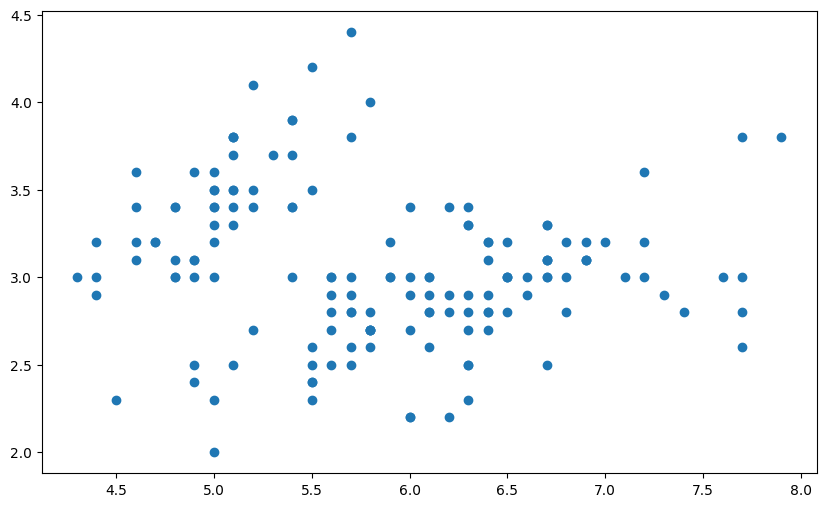

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.show()

In [16]:
X = df
y = iris.target

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3, init='k-means++', n_init=5, max_iter=100, random_state=42)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=5, random_state=42)

In [19]:
print(model.labels_)
print(model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


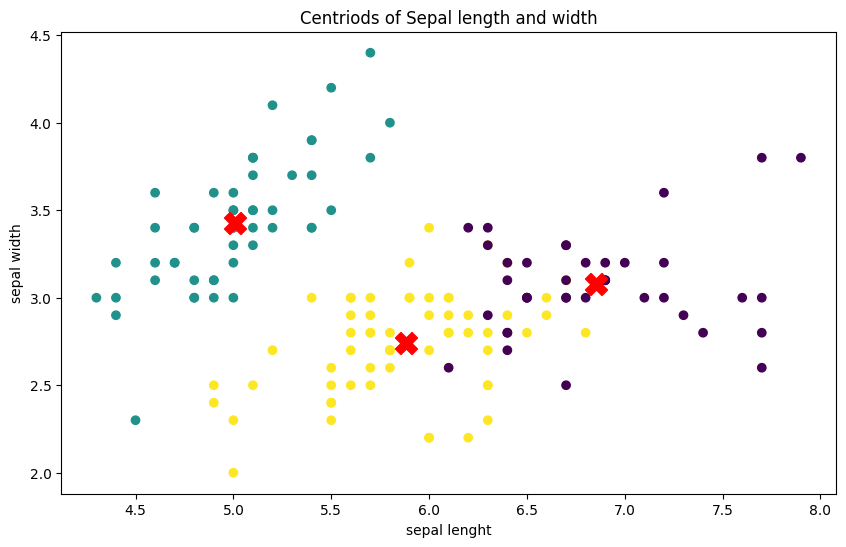

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker='X', c="red", s=250)
plt.title("Centriods of Sepal length and width")
plt.xlabel("sepal lenght")
plt.ylabel("sepal width")
plt.show()


In [21]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [22]:
new_point = [[5.0, 3.4, 1.5, 0.2]]
yp = model.predict(new_point)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [23]:
yp

array([1], dtype=int32)

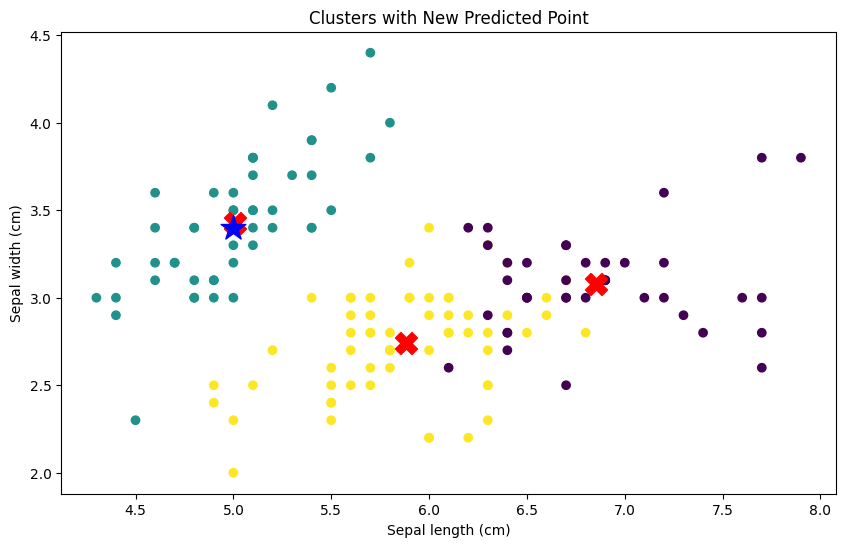

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker='X', c="red", s=250)
plt.title("Centriods of Sepal length and width")
plt.xlabel("sepal lenght")
plt.ylabel("sepal width")


plt.scatter(new_point[0][0], new_point[0][1], marker= "*", c = "blue", s=350)
plt.title("Clusters with New Predicted Point")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


In [25]:
# Custom data: Generate make_blobs(n_samples=400, centers=5, cluster_std=1.2) and cluster.

# Anomaly detection (advanced): Create a dataset where most points are clustered but include a few far-away points; compute distance to centroid and flag points with large distance as anomalies.

In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=5, cluster_std=1.2)

In [27]:
from sklearn.cluster import KMeans

model1 = KMeans(n_clusters = 5, n_init = 5, max_iter=100, init='k-means++', random_state=42)

In [28]:
model1.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=5, random_state=42)

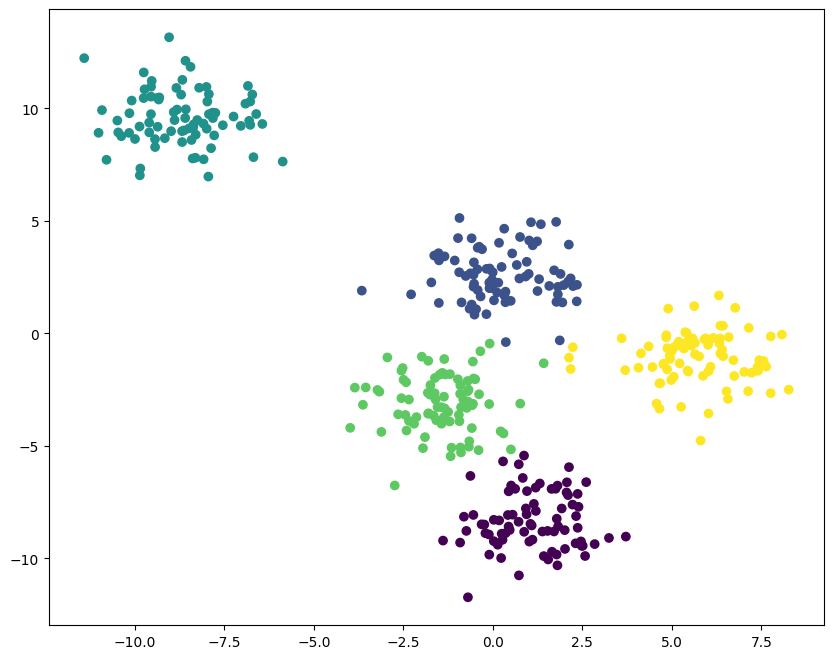

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:,1], c= model1.labels_)

plt.show()

In [30]:
# Anomaly detection (advanced): Create a dataset where most points are clustered but include a few far-away points; compute distance to centroid and flag points with large distance as anomalies.

In [31]:
data = {
    "Marks": [30, 60, 65, 66, 67, 40, 30, 32, 11, 10],
    "Grade": [3, 1, 1, 1, 1, 2, 2, 3, 3, 3]  # B=1, C=2, F=3
}



In [32]:
df = pd.DataFrame(data)
df

,Marks,Grade
0,30,3
1,60,1
2,65,1
3,66,1
4,67,1
5,40,2
6,30,2
7,32,3
8,11,3
9,10,3


In [33]:
model2 = KMeans(n_clusters=3, init='k-means++', random_state=42)
model2.fit(df)

KMeans(n_clusters=3, random_state=42)

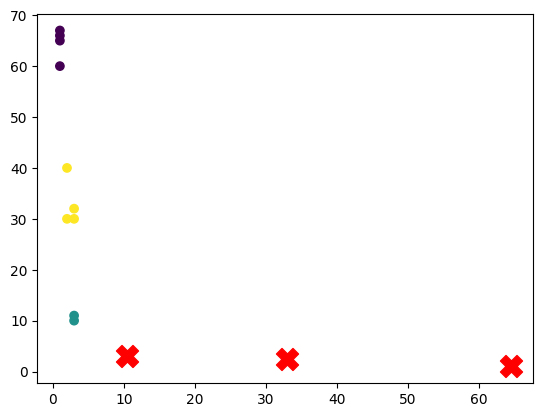

In [34]:
plt.scatter(df['Grade'], df["Marks"] , c = model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:,1], marker = "X", c= "red" , s= 250)
plt.show()

In [35]:
model2.cluster_centers_[model2.labels_]


array([[33. ,  2.5],
       [64.5,  1. ],
       [64.5,  1. ],
       [64.5,  1. ],
       [64.5,  1. ],
       [33. ,  2.5],
       [33. ,  2.5],
       [33. ,  2.5],
       [10.5,  3. ],
       [10.5,  3. ]])

In [36]:
model2.cluster_centers_

array([[64.5,  1. ],
       [10.5,  3. ],
       [33. ,  2.5]])

In [37]:
model2.labels_

array([2, 0, 0, 0, 0, 2, 2, 2, 1, 1], dtype=int32)

In [38]:
df.values

array([[30,  3],
       [60,  1],
       [65,  1],
       [66,  1],
       [67,  1],
       [40,  2],
       [30,  2],
       [32,  3],
       [11,  3],
       [10,  3]])

In [39]:
import numpy as np

distances = np.linalg.norm(df.values - model2.cluster_centers_[model2.labels_], axis=1)
# print(distances.std())

threshold = distances.mean() + 2 * distances.std()

# df["Cluster"] = model2.labels_
# df["Distance"] = distances
# df["Anomaly"] = df["Distance"] > threshold

# print(df)

In [40]:
anomalies = df[distances > threshold]
anomalies['Marks']

,Marks
5,40


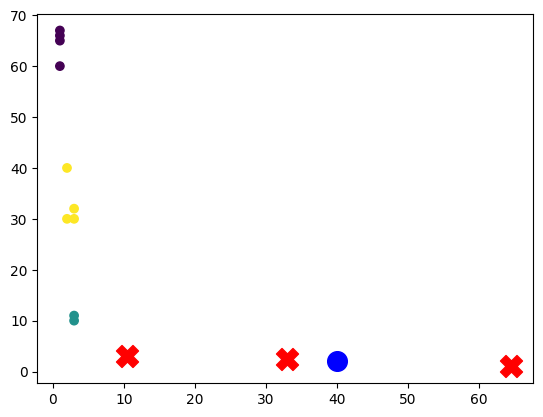

In [41]:
plt.scatter(df['Grade'], df["Marks"] , c = model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:,1], marker = "X", c= "red" , s= 250)
plt.scatter(anomalies['Marks'], anomalies['Grade'], marker = "o", s = 200, c = "blue")
plt.show()